# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

In [2]:
import matplotlib.pyplot as plt
import numpy as np


### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Soluzione proposta 
Per ridurre l'errore sulla stima del potenziale e della pressione, dovuto al raggio di cutoff, possiamo sfruttare la densita' di distribuzione radiale $g(r)$.

Sappiamo infatti che:

$$ \langle V\rangle_{tail}=2\pi\rho N\int_{r_c}^{\infty}r^2v(r)g(r) \ dr$$

e possiamo ipotizzare che per $r>r_c$ le posizioni siano equiprobabili, ovvero $g(r)=1$, ottenendo come correzioni

$$ \frac{\left< V_{LJ}\right>_{tail}}{N} = 8\pi \rho_{LJ}\varepsilon \bigl( \frac{1}{9r^9_{c(LJ)}} - \frac{1}{3r^3_{c(LJ)}}\bigr)  $$

e

$$ \frac{\left< W_{LJ}\right>_{tail}}{3N\varepsilon} = 32\pi \rho_{LJ} \bigl( \frac{1}{9r^9_{c(LJ)}} - \frac{1}{6r^3_{c(LJ)}}\bigr) $$




### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Soluzione Proposta

Per ottenere un tasso di accettazione dell'algoritmo di Metropolis di circa il 50% sono stai usati i seguenti $\delta$:

 1. Solido: $\delta=0.12$
 2. Liquido: $\delta=0.2$
 3. Gas: $\delta=7.75$
 
 
 Sono di seguito riportati i grafici di termalizzazione, ottenuti osservando l'energia potenziale per particella.

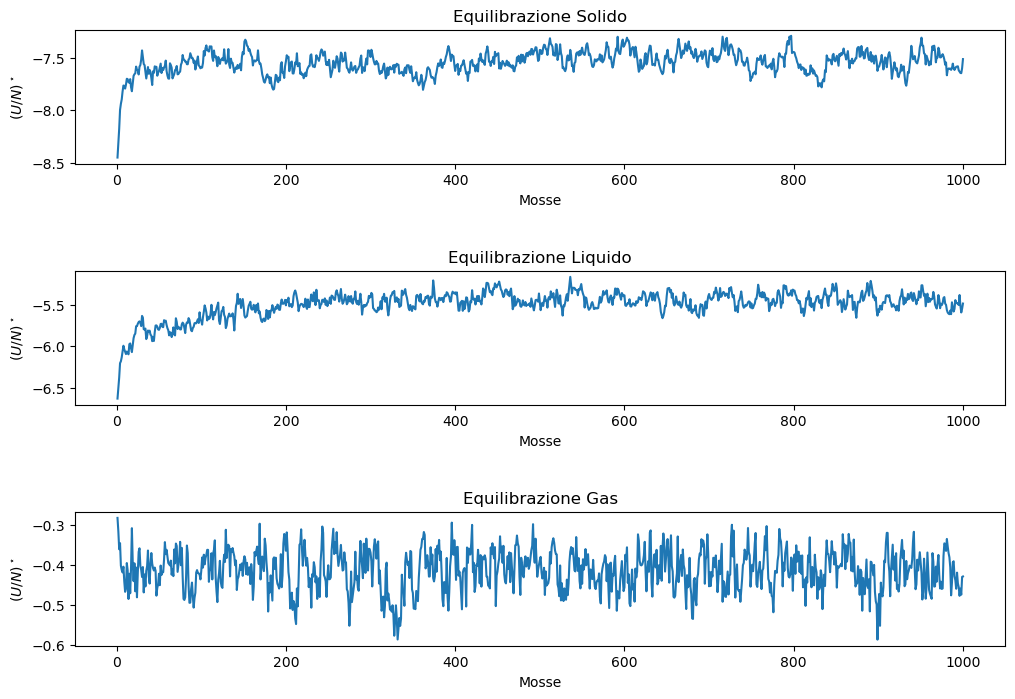

In [2]:
import numpy as np
import matplotlib.pyplot as plt

solido = np.loadtxt("./SolidoMC/output_epot_terma.dat")
liquido = np.loadtxt("./LiquidoMC/output_epot_terma.dat")
gas = np.loadtxt("./GasMC/output_epot_terma.dat")

fig, axs = plt.subplots(3, 1, figsize=(12, 8))

axs[0].set_title('Equilibrazione Solido')
axs[0].plot(solido[:, 0], solido[:, 1], label='Solido')
axs[0].set_xlabel("Mosse")
axs[0].set_ylabel(r"$(U/N)^\star$")


axs[1].set_title('Equilibrazione Liquido')
axs[1].plot(liquido[:, 0], liquido[:, 1], label='Liquido')
axs[1].set_xlabel("Mosse")
axs[1].set_ylabel(r"$(U/N)^\star$")


axs[2].set_title('Equilibrazione Gas')
axs[2].plot(gas[:, 0], gas[:, 1], label='Gas')
axs[2].set_xlabel("Mosse")
axs[2].set_ylabel(r"$(U/N)^\star$")


plt.subplots_adjust(hspace=0.8)
plt.show()


## Studio dell'autocorrelazione del data blocking
Una volta raggiunto l'equilibrio sono stati prodotte ulteriori misure per lo studio dell'autocorrelazione 

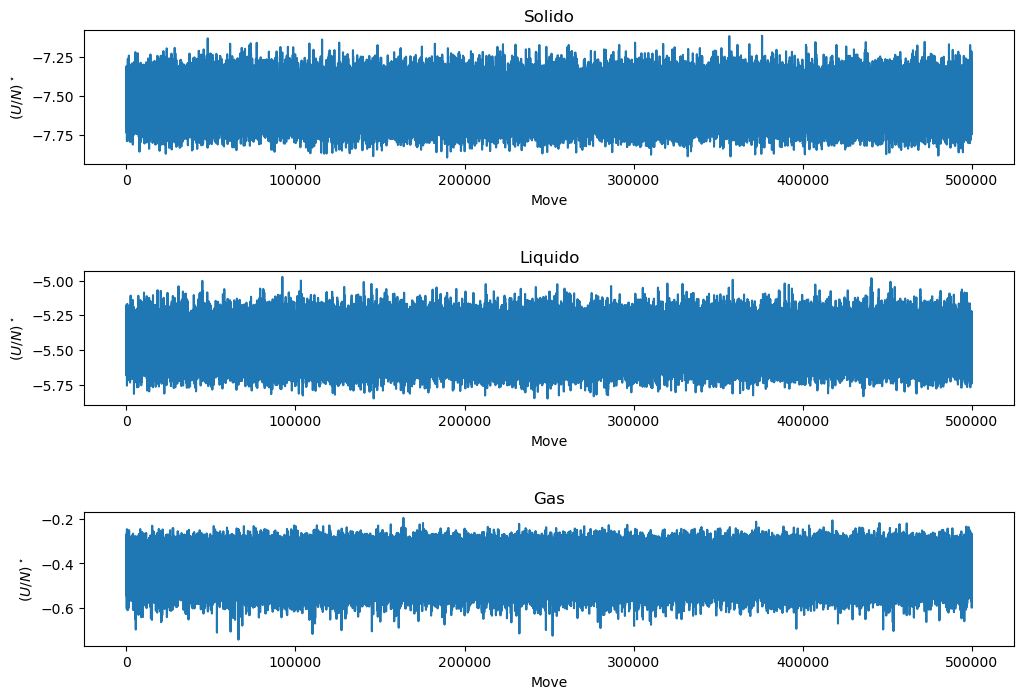

In [42]:
## ora bisogna studiare l'autocorrelazione in quanto in metropolis gli stati successivi sono legati da quella precedente
## mostriamo come cio si possa risolvere con il data blocking, vediamo come va l'autocorrelazione al variare della grandezza dei blocchi

#per prima cosa stampo l'energia pot di 10^4 Mosse

solido = np.loadtxt("./SolidoMC/output_epot_test.dat")
liquido = np.loadtxt("./LiquidoMC/output_epot_test.dat")
gas = np.loadtxt("./Gas/output_epot_test.dat")

fig, axs = plt.subplots(3, 1, figsize=(12, 8))

axs[0].set_title('Solido')
axs[0].plot(solido[:, 0], solido[:, 1], label='Solido')
axs[0].set_xlabel("Move")
axs[0].set_ylabel(r"$(U/N)^\star$")


axs[1].set_title('Liquido')
axs[1].plot(liquido[:, 0], liquido[:, 1], label='Liquido')
axs[1].set_xlabel("Move")
axs[1].set_ylabel(r"$(U/N)^\star$")


axs[2].set_title('Gas')
axs[2].plot(gas[:, 0], gas[:, 1], label='Gas')
axs[2].set_xlabel("Move")
axs[2].set_ylabel(r"$(U/N)^\star$")




plt.subplots_adjust(hspace=0.8)
plt.show()


### Autocorrelazione
L'autocorrelazione è una misura di quanto il sistema è correlato ad una copia futura di sé stesso. È fondamentale per il nostro studio perche gli step successivi di Metropolis saranno correlati, e di conseguenza è opportuno scegliere, nel data blocking, una dimensione dei blocchi tale da superare di molto il tempo di correlazione delle misure. In questo modo le medie a blocchi saranno davvero campioni indipendenti e si potrà procedere nell'analisi senza il timore che i dati siano inficiati dalla correlazione interna tra di loro. </br>
Si è quindi calcolata la funzione di autocorrelazione $\chi (n)$ in funzione del numero di step Metropolis, su un campione di $M = 5 \cdot 10^5$ dati. Ci si aspetta che la funzione di autocorrelazione abbia un decadimento esponenziale, ed è stata calcolata implementando la seguente formula nel seguente blocco di codice:

\begin{equation}
\chi(t) = \frac{1}{n_{max} - n}\frac{\sum_{n' = 0}^{n_{max} - n} m(n')m(n'+n) - \sum_{n' = 0}^{n_{max} - n}m(n')\sum_{n' = 0}^{n_{max} - n}m(n'+n)}{ \frac{1}{n_{max}} \sum_{n'=0}^{n_{max}} m^2(n') - \left( \frac{1}{n_{max}} \sum_{n'=0}^{n_{max}} m(n')\right)^2}
\end{equation}

Dove $n$ è il numero di step e $n_{max}$ il numero totale di misure. $m(n)$ è la funzione che si vuole valutare, nel caso di questo Notebook è l'energia interna del sistema $U$.


10000
10000
10000


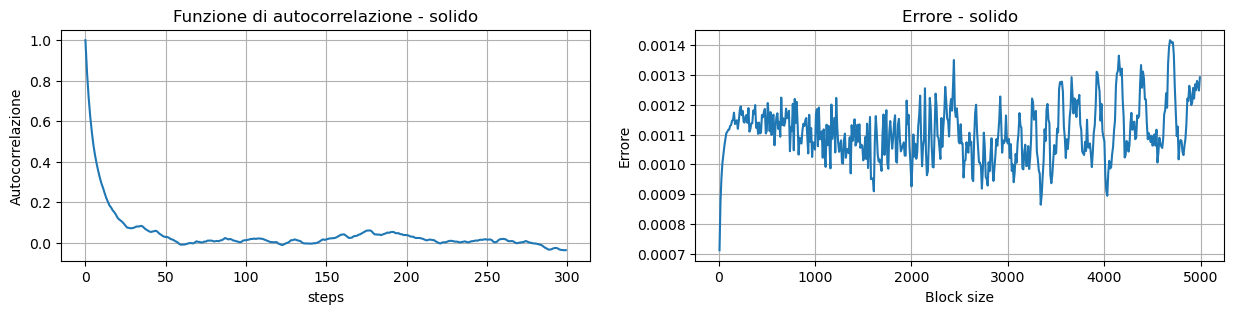

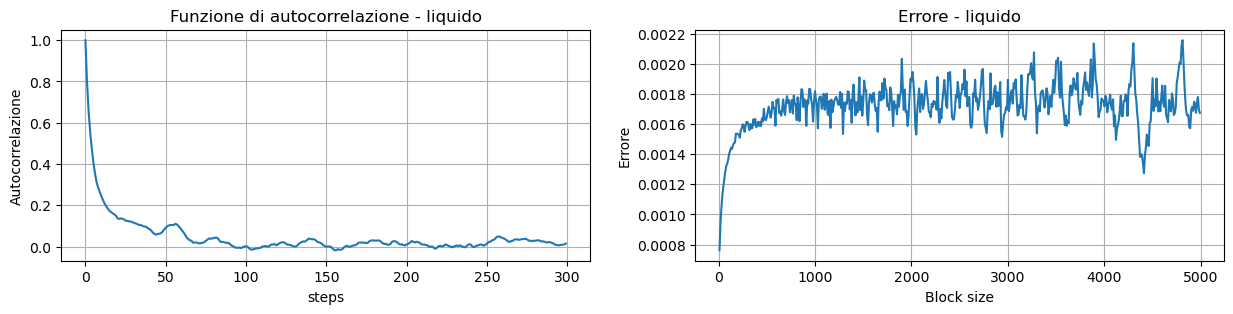

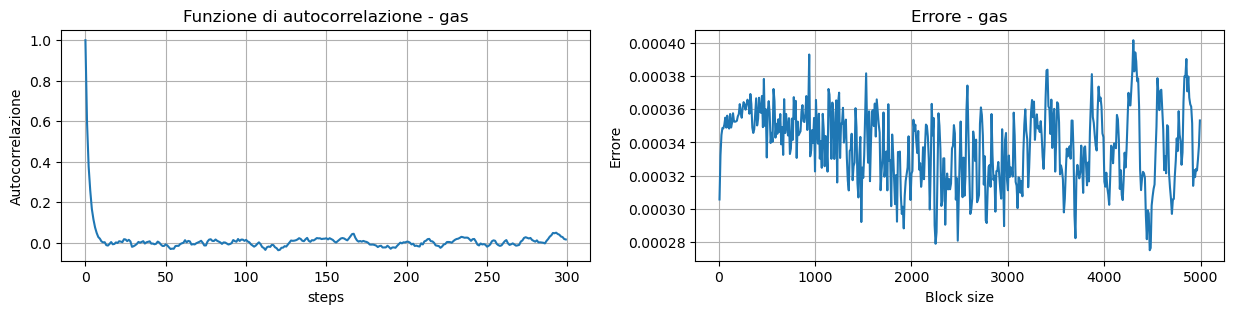

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


name = ["./SolidoMC/output_epot_test.dat", "./Liquido/output_epot_test.dat", "./Gas/output_epot_test.dat"]
title2 = ["Errore - solido", "Errore - liquido", "Errore - gas"]
title1 = ["Funzione di autocorrelazione - solido", "Funzione di autocorrelazione - liquido", "Funzione di autocorrelazione - gas"]
y_label = ["Autocorrelazione", "Errore"]
x_label = ["steps", "Block size"]
xlines = [1000,200,100]
throws=100000             # Total number of throws
    
def autocorr(data, t):       ####### Autocorrelation function
    
    t_max = len(data)
    sum4 = np.sum(data**2)
    sum5 = np.sum(data)
    denom = sum4/t_m  -  (sum5/t_m)**2
    
    sum1=np.sum(data[:int(t_max-t)]*data[t:])
    sum2=np.sum(data[:int(t_max-t)])
    sum3=np.sum(data[t:])
    
    result = ( sum1/(t_max - t) - (sum2 * sum3)/(t_max - t)**2 ) / denom 
    return result

def error(AV,AV2,n):  ######### Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

def blockerror(data, N, L) :      ####### N=numero di blocchi, L=numero di dati in un blocco
    
    ave = np.zeros(N, dtype=float)
    av2 = np.zeros(N, dtype=float)
    sum_prog = np.zeros(N, dtype=float)
    sum2_prog = np.zeros(N, dtype=float)
    
    for i in range(N):

        sum1 = 0
        for j in range(L):
            k = j+i*L
            sum1 += data[k]    
        ave[i] = sum1/L     # r_i 
        av2[i] = (ave[i])**2 # (r_i)^2 

    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
            sum2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        sum2_prog[i]/=(i+1) # Cumulative square average

    err = error(sum_prog,sum2_prog, N-1) # Statistical uncertainty
    
    return err

sizes = [10 * i for i in range(1,500)]

for i in range(3): 
    
    data = np.loadtxt( name[i],usecols=1,max_rows=100000)
    dataCORR=data[:10000]
    t_m = len(dataCORR)
    
    
    x = [i for i in range(len(dataCORR-1))]
    times = [i for i in range(0,t_m)]
    
    auto = [autocorr(dataCORR, i) for i in range(0, 300)]
    errore = [blockerror(data, int(throws/j), j) for j in sizes]
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    
    axes[0].plot(times[:300], auto[:300]) 
    axes[0].set_title(title1[i], fontsize=12)
    axes[0].set_xlabel(x_label[0])
    axes[0].set_ylabel(y_label[0])
    axes[0].grid(True)
    
    axes[1].plot(sizes, errore) 
    axes[1].set_title(title2[i], fontsize=12)
    axes[1].set_xlabel(x_label[1])
    axes[1].set_ylabel(y_label[1])
    axes[1].grid(True)
    
plt.show()


Si osserva come per 100 steps le misure di autocorrelazione di tute e tre le fasi risultino soppresse.

Si osserva inoltre ,dai grafici degli errori in funzione della lunghezza $L$ dei blocchi, come inizialmente l'errore venga sottostimato, proprio a causa dell'autocorrelazione dei dati prodotti, per poi stabilizzarsi e iniziare a oscillare intorn a un valore maggiore.

In conclusione, per le simulazioni di tutte e tre le fasi, si e' scelto di usare N=20 blocchi da L=2000 mosse ciascuno


**Nota:** dato che il calcolo dell'autocorrelazione era troppo lungo, ci si e' limitati a usare $10^4$ valori,
per l'errore sono state usate tutte le 100.000 mosse

## Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Soluzione proposta

Data

\begin{equation}
g(r) = \frac{1}{\rho N \Delta V(r)} \langle \sum \sum_{i \neq j = 1}^{N} \delta \left[|\vec(r)| - |(\vec{r_i}-\vec{r_j}| \right]\rangle
\end{equation}

La $g(r)$ e' stata implementata andando a creare 500 bins e andando a incrementare di 2 un contatore ogni volta che 2 particelle venivano trovate a una distanza corrispondente a quella del bin

### Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

### Soluzione Proposta

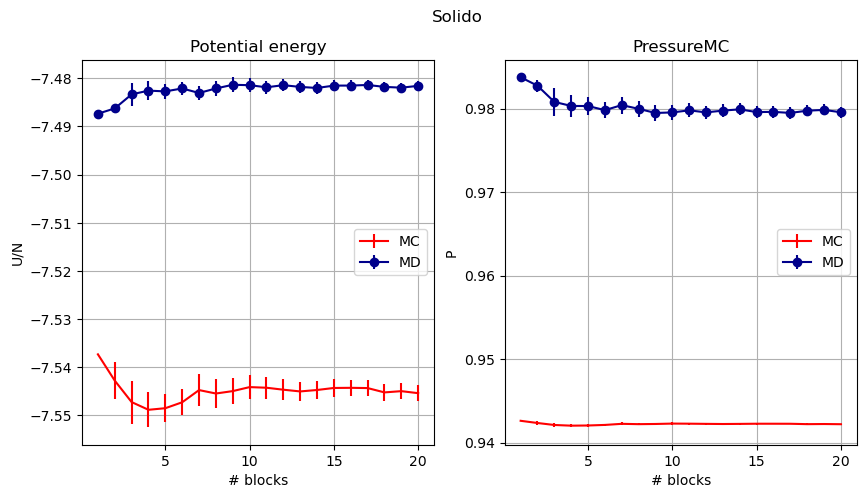

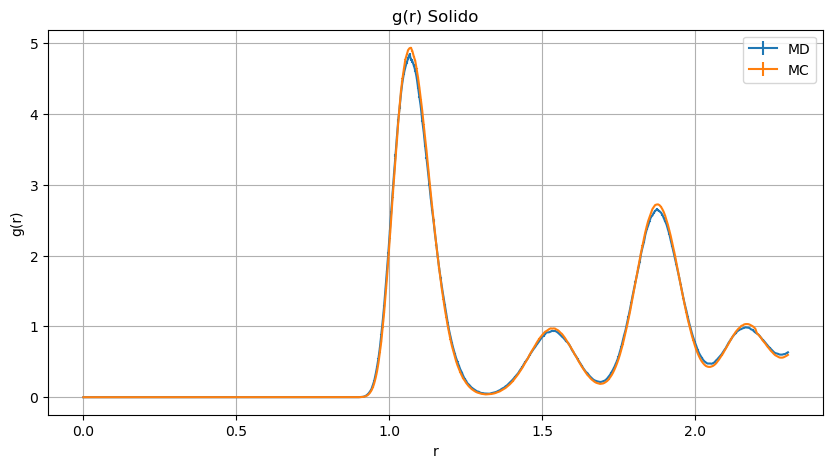

In [38]:
name = ["./SolidoMC/output_epot.dat", "./SolidoMC/output_pres.dat"]
name2 = ["./SolidoMD/output_epot.dat", "./SolidoMD/output_pres.dat"]
title = ["Potential energy", "Pressure"]

y_label = ["U/N", "P"]
x_label = "# blocks"
 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('Solido')

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    axes[i].errorbar(data[:,0], data[:,2], yerr=data[:,3], color='red',label='MC')
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label[i])
    axes[i].grid(True)
    axes[i].legend()

for i in range(2): 
    
    data = np.loadtxt( name2[i] )
    
    axes[i].errorbar(data[:,0], data[:,2], yerr=data[:,3], color='darkblue',marker='o',label='MD')
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label[i])
    axes[i].grid(True)
    axes[i].legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

data_gdirmc=np.loadtxt("./SolidoMC/output_gdir.dat")      # grafico gdir
data_gdirmd=np.loadtxt("./SolidoMD/output_gdir.dat")

plt.figure(figsize=(10,5))
plt.errorbar(data_gdirmd[:,0], data_gdirmd[:,1], yerr=data_gdirmd[:,2],label='MD')
plt.errorbar(data_gdirmc[:,0], data_gdirmc[:,1], yerr=data_gdirmc[:,2],label='MC')
plt.title("g(r) Solido")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.grid(True)
plt.legend()




plt.show()

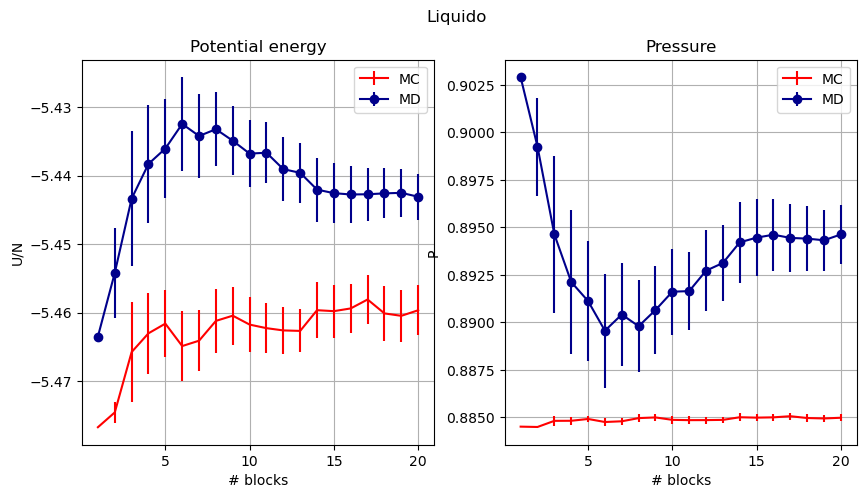

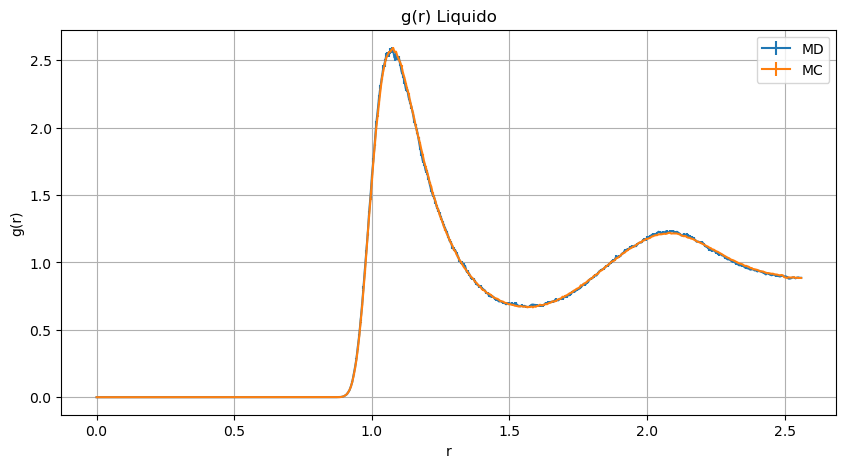

In [48]:
name = ["./LiquidoMC/output_epot.dat", "./LiquidoMC/output_pres.dat"]
name2 = ["./LiquidoMD/output_epot.dat", "./LiquidoMD/output_pres.dat"]
title = ["Potential energy", "Pressure"]

y_label = ["U/N", "P"]
x_label = "# blocks"
 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('Liquido')

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    axes[i].errorbar(data[:,0], data[:,2], yerr=data[:,3], color='red',label='MC')
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label[i])
    axes[i].grid(True)
    axes[i].legend()

for i in range(2): 
    
    data = np.loadtxt( name2[i] )
    
    axes[i].errorbar(data[:,0], data[:,2], yerr=data[:,3], color='darkblue',marker='o',label='MD')
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label[i])
    axes[i].grid(True)
    axes[i].legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

data_gdirmc=np.loadtxt("./LiquidoMC/output_gdir.dat")      # grafico gdir
data_gdirmd=np.loadtxt("./LiquidoMD/output_gdir.dat")

plt.figure(figsize=(10,5))
plt.errorbar(data_gdirmd[:,0], data_gdirmd[:,1], yerr=data_gdirmd[:,2],label='MD')
plt.errorbar(data_gdirmc[:,0], data_gdirmc[:,1], yerr=data_gdirmc[:,2],label='MC')
plt.title("g(r) Liquido")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.grid(True)
plt.legend()




plt.show()

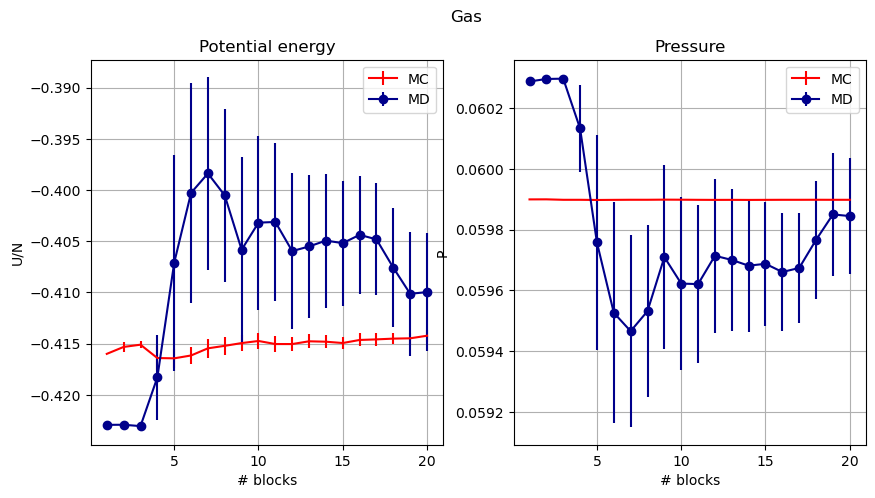

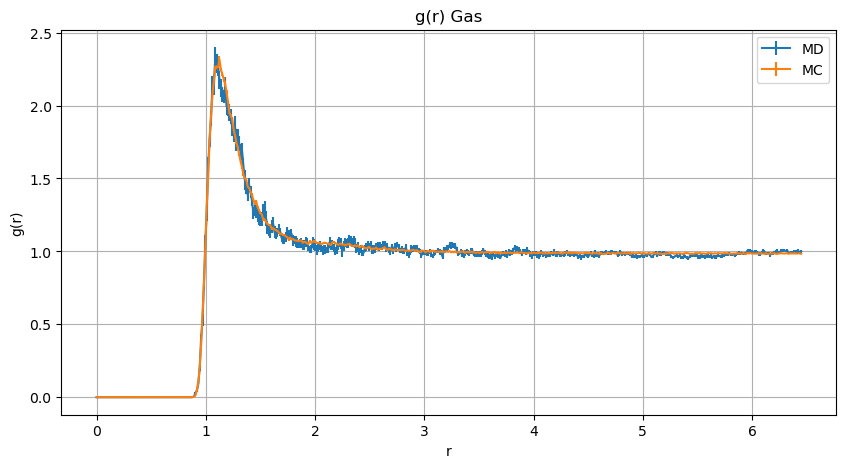

In [52]:
name = ["./GasMC/output_epot.dat", "./GasMC/output_pres.dat"]
name2 = ["./GasMD/output_epot.dat", "./GasMD/output_pres.dat"]
title = ["Potential energy", "Pressure"]

y_label = ["U/N", "P"]
x_label = "# blocks"
 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('Gas')

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    axes[i].errorbar(data[:,0], data[:,2], yerr=data[:,3], color='red',label='MC')
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label[i])
    axes[i].grid(True)
    axes[i].legend()

for i in range(2): 
    
    data = np.loadtxt( name2[i] )
    
    axes[i].errorbar(data[:,0], data[:,2], yerr=data[:,3], color='darkblue',marker='o',label='MD')
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label[i])
    axes[i].grid(True)
    axes[i].legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

data_gdirmc=np.loadtxt("./GasMC/output_gdir.dat")      # grafico gdir
data_gdirmd=np.loadtxt("./GasMD/output_gdir.dat")

plt.figure(figsize=(10,5))
plt.errorbar(data_gdirmd[:,0], data_gdirmd[:,1], yerr=data_gdirmd[:,2],label='MD')
plt.errorbar(data_gdirmc[:,0], data_gdirmc[:,1], yerr=data_gdirmc[:,2],label='MC')
plt.title("g(r) Gas")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.grid(True)
plt.legend()




plt.show()

### Commenti Finali

Osservando le $g(r)$ ottenute possiamo notare come nel caso del Solido siano presenti vari punti di massimo: esistono delle distanze interatomiche caratteritiche tipiche della struttra cristallina dei solidi, lo stesso discorso si applica, seppur ovviamente in misura minore alla fase liquida. Al contrario, nella fase gassosa, la minor intensita' dei legami fa si' che esista un unica distanza tipica mentre le altre risultano tutte equiprobabili.